In [ ]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


In [ ]:
def co_var_mtx(lo, dim):
  return np.array([[ pow(lo, abs(i-j)) for j in range(dim)] for i in range(dim)])

def decompistion(metrix):
  val, vetor = linalg.eig(metrix)
  val = val.real
  val = np.diag(val)
  return val, vetor

def data_gen(dim, N):
  return np.array([np.random.normal(0, 1, N) for i in range(dim)])

def tranform(vetor, val, data):
  return np.dot(np.dot(vetor, val**0.5),data)

def singal_plot(plot_data):
  sns.jointplot(x=plot_data[0], y=plot_data[1])
  sns.jointplot(x=plot_data[0], y=plot_data[1], kind="kde")


def gen_dataset(M, lo, dim, N, data_class):
  metrix = co_var_mtx(lo, dim)
  val, vetor = decompistion(metrix)
  data = data_gen(dim, N)
  plot_data = tranform(vetor, val, data)
  plot_data += np.array([[M for i in range(50)],]*10000).T
  df = pd.DataFrame(data=plot_data.T)
  df['class'] = data_class
  return df

In [ ]:
df1 = gen_dataset(0, .9, 50, 10000, 1)
df2 = gen_dataset(.5, .7, 50, 10000, 2)
df = pd.concat([df1,df2])
df.shape, df1.shape, df2.shape

((20000, 51), (10000, 51), (10000, 51))

In [ ]:


class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

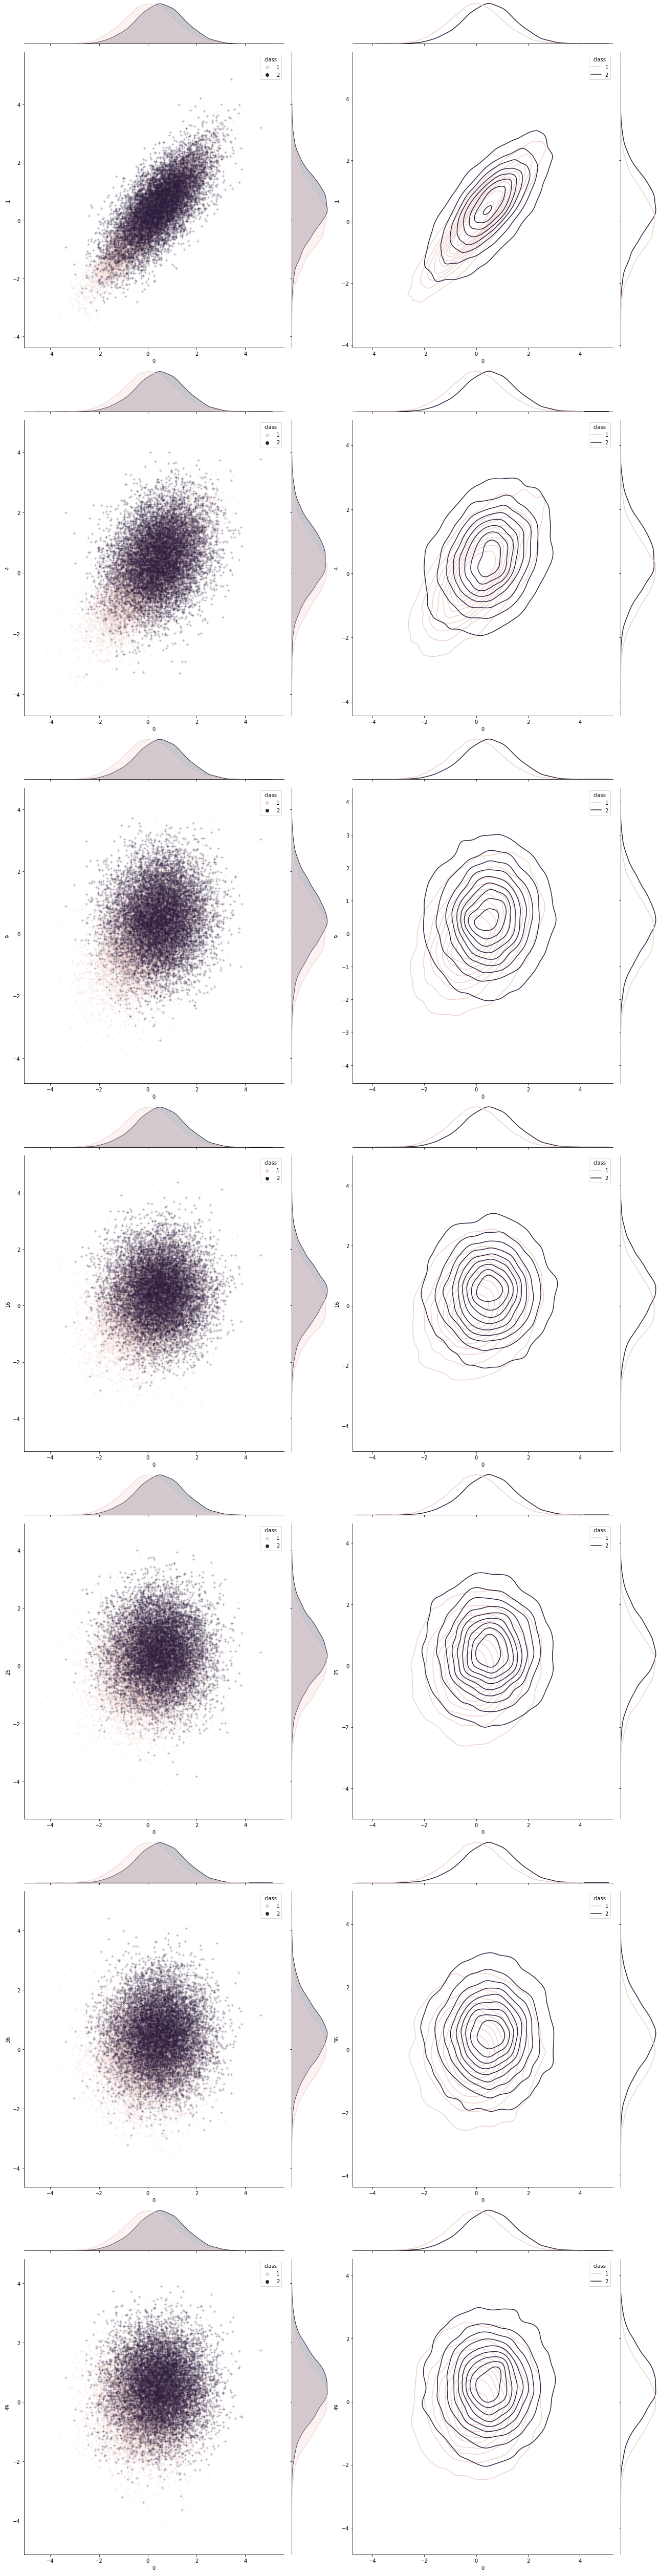

In [ ]:
col = [ i for i in range(1,8)]
# col = [ i for i in range(1,2)]

fig = plt.figure(figsize=(18,len(col)*10))
gs = gridspec.GridSpec(len(col), 2)
for i in col:
  y = i**2
  g0 = sns.jointplot(data=df, x=0, y=y, hue="class", marker="+", alpha=0.7)
  g1 = sns.jointplot(data=df, x=0, y=y, kind="kde", hue="class")
  
  mg0 = SeabornFig2Grid(g0, fig, gs[2*(i-1)])
  mg1 = SeabornFig2Grid(g1, fig, gs[2*(i-1)+1])

gs.tight_layout(fig)
plt.show()

In [ ]:
num1, num2 = 4000,4000
mu1_x1, sigma1_x1 = 10, 3
mu1_x2, sigma1_x2 = 13, 3
mu2_x1, sigma2_x1 = 7, 1
mu2_x2, sigma2_x2 = 5, 2
d1={
  'x1': np.random.normal(mu1_x1, sigma1_x1, num1),
  'x2': np.random.normal(mu1_x2, sigma1_x2, num1),
  'class': np.array([0]*num1),
}
d2={
  'x1': np.random.normal(mu2_x1, sigma2_x1, num2),
  'x2': np.random.normal(mu2_x2, sigma2_x2, num2),
  'class': np.array([1]*num2),
}
d_out={
  'x1': np.concatenate((d1['x1'], d2['x1'])),
  'x2': np.concatenate((d1['x2'], d2['x2'])),
  'class': np.concatenate((d1['class'], d2['class'])),
}

df = pd.DataFrame(data=d_out)

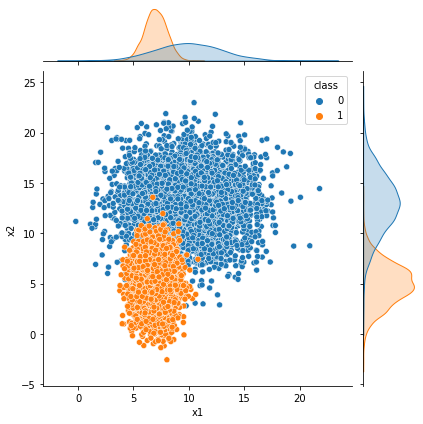

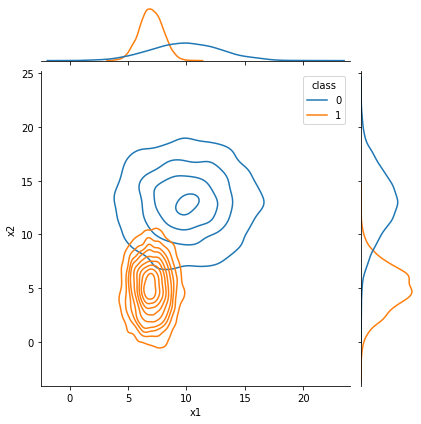

In [ ]:
%matplotlib inline
import seaborn as sns
sns.jointplot(data=df, x="x1", y="x2", hue="class")
sns.jointplot(data=df, x="x1", y="x2", hue="class", kind="kde")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def whitening(data):
  xcov = CovarianceMatrix(data.T)
  wdata = Eigenvalues(xcov, xc)
  return wdata

def CovarianceMatrix(xc):
  # Calculate covariance matrix
  xcov = np.cov(xc, rowvar=True, bias=True)
  return xcov

def Eigenvalues(xcov, xc): 
  # Calculate Eigenvalues and Eigenvectors
  w, v = linalg.eig(xcov)
  w, v = w.real, v.real
  # Note: Use w.real to (1) remove 'j' notation to real, (2) round to '4' significant digits
  # print("Eigenvalues:\n", w.real)
  # print("Eigenvectors:\n", v.real)
  
  # Calculate inverse square root of Eigenvalues
  # Optional: Add '.1e5' to avoid division errors if needed
  # Create a diagonal matrix
  diagw = np.diag(1/(w**0.5)) # or np.diag(1/((w+.1e-5)**0.5))
  diagw = diagw.real #convert to real and round off
  # print("Diagonal matrix for inverse square root of Eigenvalues:\n", diagw)
  
  # Calculate Rotation (optional)
  # Note: To see how data can be rotated
  # xrot = np.dot(v, xc)
  
  # Whitening transform using PCA (Principal Component Analysis)
  # wpca = np.dot(np.dot(diagw, v.T), xc)
  # print(wpca)

  # Whitening transform using ZCA (Zero Component Analysis)
  wzca = np.dot(np.dot(np.dot(v, diagw), v.T), xc)
  return wzca

# whitening(df[df['class']==0][['x1','x2']].to_numpy())

In [ ]:
# wd = whitening(df.to_numpy())
wd1 = whitening(df[df['class']==0][['x1','x2']].to_numpy())
wd2 = whitening(df[df['class']==1][['x1','x2']].to_numpy())

NameError: ignored

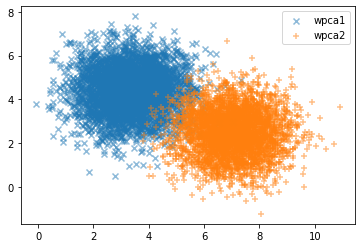

In [ ]:
# plt.scatter(
#   wd[0,:], wd[1,:], 
#   label='wpca1', alpha=0.5, marker='x'
# )
plt.scatter(
  wd1[0,:], wd1[1,:], 
  label='wpca1', alpha=0.5, marker='x'
)
plt.scatter(
  wd2[0,:], wd2[1,:], 
  label='wpca2', alpha=0.5, marker='+'
)
plt.legend()